# Insper - Modelagem e Simulação do Mundo Físico

## Simulção de um copo de água esfriando/aquecendo no ambiente

## Bibliotecas

In [133]:
#Importa bibliotecas necessárias
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from math import *

## Dados experimentais

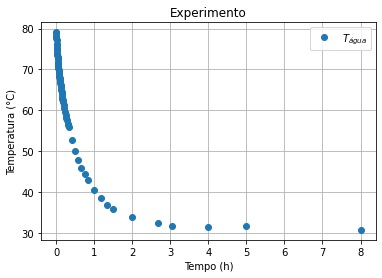

In [134]:
lista_t_exp = [5/3600 ,10/3600 ,20/3600 ,30/3600 ,40/3600 ,50/3600 ,60/3600,75/3600,90/3600,105/3600,120/3600,135/3600,150/3600,165/3600,180/3600,195/3600,210/3600,225/3600,240/3600,255/3600,270/3600,285/3600,300/3600,315/3600,330/3600,345/3600,360/3600,390/3600,420/3600,450/3600,480/3600,510/3600,540/3600,570/3600,600/3600,630/3600,660/3600,720/3600,780/3600,840/3600,900/3600,960/3600,1020/3600,1080/3600,1140/3600,1200/3600,1500/3600,1800/3600,2100/3600,2400/3600,2700/3600,3000/3600,3600/3600,4200/3600,4800/3600,5400/3600,7200/3600,9600/3600,10920/3600,4,5,8]

lista_Ta_exp = [79.1,78.8,78.3,77.6,77.1,76.3,75.9,75.3,74.7,74.0,73.5,73.0,72.5,71.9,71.4,71.1,70.8,70.3,69.9,69.5,69.4,68.9,68.5,68.1,67.8,67.5,67.1,66.6,66.1,65.6,65.0,64.5,63.9,63.3,62.8,62.5,62.0,61.2,60.5,59.6,58.8,58.1,57.5,56.7,56.4,55.8,52.8,50.1,47.8,45.8,44.4,42.8,40.5,38.5,36.9,35.7,33.8,32.3,31.7,31.5,31.6,30.7]

experimento, ax = plt.subplots()
plt.plot(lista_t_exp, lista_Ta_exp, 'o', label = '$T_{água}$')
plt.title('Experimento')
plt.xlabel('Tempo (h)')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)
plt.show()
experimento.savefig('1.Experimento.png',  format = 'png', dpi = 1200)

## Parâmetros do modelo

In [135]:
# Declara os parâmetros do modelo

# Dimensões (m)
r = 0.031                # Recipiente (raio interno)
hr = 0.1                 # Recipiente (altura)
dr = 0.002/2             # Recipiente (espessura)  (1/2)

# Áreas (m2)
As = pi*r**2             # Óleo (superfície)
Ap = 2*pi*r*hr           # Recipiente (paredes externas)
Ar = Ap                  # Recipiente (paredes internas)

# Volumes (m3)
va = As*hr               # Óleo
vr = As*(2*dr)+Ap*(2*dr) # Recipiente

# Densidades (kg/m3)
rhoa = 997               # Óleo
rhor = 2500              # Recipiente (aço)

# Massas (kg)
ma = rhoa*va             # Óleo
mr = rhor*vr             # Recipiente

# Calores específicos (J/(kg.K))
ca = 4180                # Óleo
cr = 812                 # Recipiente (vidro)

# Coeficientes de condutividade térmica (W/(m.K))
kr = 1.05                # Recipiente (aço)

# Coeficiente de transferência convectiva (W/(m2.K))
hs = 15                  # Oleo para o ar
hp = 15                  # Recipiente para o ar

#Temperaturas (K)
Tar = 30.5+273.15        # Ambiente
Ta = 80+273.15
Tr = 80+273.15


----
# 1° iteração

## Função modelo

In [136]:
def modelo (x, t):

    Ta = x[0]
    Tr = x[1]

    Qs = (Ta-Tar)/(1/(hs*As))
    Qr = (Ta-Tr)/(dr/(kr*Ar))
    Qp = (Tr-Tar)/((dr/(kr*Ar))+(1/(hp*Ap)))

    dTadt = (-Qs-Qr)/(ma*ca)
    dTrdt = (Qr-Qp)/(mr*cr)
    dxdt = [dTadt, dTrdt]
    
    return dxdt

## Validação

## 1° Iteração

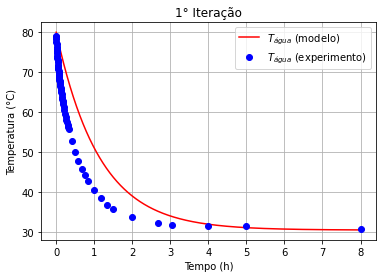

In [137]:
# Lista tempo
t_lista = np.arange(0, 28800, 1)

# Condições iniciais
x0 = [Ta, Tr]

# Resolução numérica
x = odeint(modelo, x0, t_lista)
Ta_lista = x[:,0]-273.15
Tr_lista = x[:,1]-273.15

validacao1, ax = plt.subplots()

# Plota gráficos
plt.plot(t_lista/3600, Ta_lista, 'r', label = '$T_{água}$ (modelo)')
# plt.plot(t_lista/3600, Tr_lista, label = '$T_{recipiente}$ (modelo)')
plt.plot(lista_t_exp, lista_Ta_exp, 'bo', label = '$T_{água}$ (experimento)')
plt.title('1° Iteração')
plt.ylabel('Temperatura (°C)')
plt.xlabel('Tempo (h)')
plt.legend()
plt.grid(True)
plt.show()

validacao1.savefig('2.Validação1.png',  format = 'png', dpi = 1200)

----
## 2° Iteração

## Ajuste de parâmetros

In [138]:
# Coeficiente de transferência convectiva (W/(m2.K))
hs = 26                  # Oleo para o ar
hp = 26                  # Recipiente para o ar

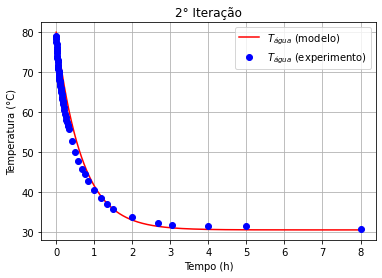

In [139]:
# Resolução numérica
x = odeint(modelo, x0, t_lista)
Ta_lista = x[:,0]-273.15
Tr_lista = x[:,1]-273.15

# Plota gráficos
validacao2, ax = plt.subplots()

plt.plot(t_lista/3600, Ta_lista, 'r', label = '$T_{água}$ (modelo)')
plt.plot(lista_t_exp, lista_Ta_exp, 'bo', label = '$T_{água}$ (experimento)')
plt.title('2° Iteração')
plt.ylabel('Temperatura (°C)')
plt.xlabel('Tempo (h)')
plt.legend()
plt.grid(True)
plt.show()

validacao2.savefig('3.Validação2.png',  format = 'png', dpi = 1200)

In [140]:
# função usada para achar tempo de equilíbrio
def T_equilibrio(lista_Ta, lista_t_h):
    if lista_Ta[0] > Tar-273.15:
        i = 0
        while lista_Ta[i] > 1.02*(Tar-273.15):
            i += 1
        return lista_t_h[i]
    else:
        i = 0
        while lista_Ta[i] < 1/1.02*(Tar-273.15):
            i += 1
        return lista_t_h[i]

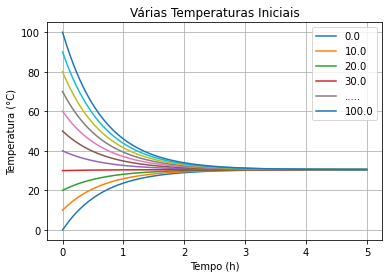

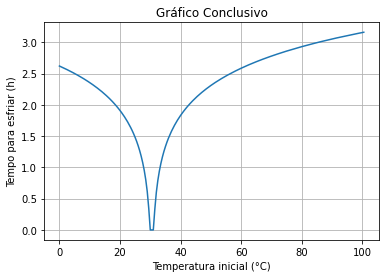

In [141]:
t_lista = np.arange(0, 18000, 1)
lista_t_equilibrio = []
lista_Tia = np.arange(0+273.15, 101+273.15, 0.5)

arcoiris, ax = plt.subplots()
i = 0
for Tia in lista_Tia:
    Tic = Tia
    TiaC = Tia-273.15
    x0 = [Tia, Tic]


    x = odeint(modelo, x0, t_lista)
    Ta_lista = x[:,0]-273.15
    lista_t_equilibrio.append(T_equilibrio(Ta_lista, t_lista/3600))

    if  i == 0 or i == 20 or i == 40 or i == 60 or i == 200:
        
        plt.plot(t_lista/3600, Ta_lista, label = (TiaC))
    
    elif i == 140:

        plt.plot(t_lista/3600, Ta_lista, label = '.....')
        
    elif i == 80 or i == 100 or i == 120 or i == 160 or i == 180:
        
        plt.plot(t_lista/3600, Ta_lista)

    i += 1


plt.title('Várias Temperaturas Iniciais')
plt.ylabel('Temperatura (°C)')
plt.xlabel('Tempo (h)')
plt.legend()
plt.grid(True)
plt.show(True)

arcoiris.savefig('4.Arco íris.png',  format = 'png', dpi = 1200)


conclusivo, ax = plt.subplots()

# plota gráfico conclusivo
plt.plot((lista_Tia-273.15), lista_t_equilibrio)
plt.title('Gráfico Conclusivo')
plt.xlabel('Temperatura inicial (°C)')
plt.ylabel('Tempo para esfriar (h)')
plt.grid(True)
plt.show()

conclusivo.savefig('5.Conclusivo.png',  format = 'png', dpi = 1200)
    
    

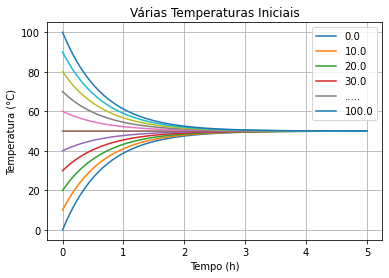

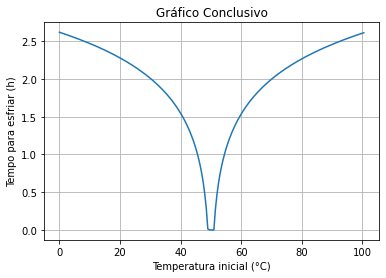

In [143]:
Tar = 50+273.15

t_lista = np.arange(0, 18000, 1)
lista_t_equilibrio = []
lista_Tia = np.arange(0+273.15, 101+273.15, 0.5)

arcoiris50, ax = plt.subplots()
i = 0
for Tia in lista_Tia:
    Tic = Tia
    TiaC = Tia-273.15
    x0 = [Tia, Tic]


    x = odeint(modelo, x0, t_lista)
    Ta_lista = x[:,0]-273.15
    lista_t_equilibrio.append(T_equilibrio(Ta_lista, t_lista/3600))

    if  i == 0 or i == 20 or i == 40 or i ==  60 or i == 200:
        
        plt.plot(t_lista/3600, Ta_lista, label = (TiaC))
    
    elif i == 140:

        plt.plot(t_lista/3600, Ta_lista, label = '.....')
        
    elif  i == 160 or i == 180 or i == 60 or i == 80 or i == 100 or i == 120:
        
        plt.plot(t_lista/3600, Ta_lista)

    i += 1


plt.title('Várias Temperaturas Iniciais')
plt.ylabel('Temperatura (°C)')
plt.xlabel('Tempo (h)')
plt.legend()
plt.grid(True)
plt.show(True)

arcoiris50.savefig('6.Arco íris50.png',  format = 'png', dpi = 1200)


conclusivo50, ax = plt.subplots()

# plota gráfico conclusivo
plt.plot((lista_Tia-273.15), lista_t_equilibrio)
plt.title('Gráfico Conclusivo')
plt.xlabel('Temperatura inicial (°C)')
plt.ylabel('Tempo para esfriar (h)')
plt.grid(True)
plt.show()

conclusivo50.savefig('7.Conclusivo50.png',  format = 'png', dpi = 1200)